In [27]:
import pandas as pd

In [28]:
data = pd.read_csv('./data_raw.csv')
data.head()

,X1 kernel_area,X2 kernel_length,Wheat Varieties
0,15.26,5.22,Kama
1,14.88,"4,956",Kama
2,14.29,"4,825",Kama
3,13.84,"4,805",Kama
4,16.14,"5,175",Kama


In [29]:
data.dtypes

X1 kernel_area      float64
X2 kernel_length     object
Wheat Varieties      object
dtype: object

In [30]:
# 컬럼명을 python 이 처리하기 쉬운 형태로 변경
data.rename(
    columns={
        'X1 kernel_area': 'x1_kernel_area',
        'X2 kernel_length': 'x2_kernel_length',
        'Wheat Varieties': 'wheat_varieties',
    }, inplace=True
)
data.columns

Index(['x1_kernel_area', 'x2_kernel_length', 'wheat_varieties'], dtype='object')

In [31]:
# 데이터 전처리
data['x2_kernel_length'] = data['x2_kernel_length'].str.replace(',', '')
data['x2_kernel_length'] = data['x2_kernel_length'].astype(float)
data['wheat_varieties'] = data['wheat_varieties'].str.replace(' ', '')
data.head()

,x1_kernel_area,x2_kernel_length,wheat_varieties
0,15.26,5.22,Kama
1,14.88,4956.00,Kama
2,14.29,4825.00,Kama
3,13.84,4805.00,Kama
4,16.14,5175.00,Kama


In [32]:
data.describe()

,x1_kernel_area,x2_kernel_length
count,210.000000,210.000000
mean,14.847524,4814.142143
std,2.909699,1753.777465
min,10.590000,4.830000
25%,12.270000,4961.000000
50%,14.355000,5175.500000
75%,17.305000,5826.500000
max,21.180000,6498.000000


In [33]:
data['wheat_varieties'].unique()

array(['Kama', 'Rosa', 'Canadian'], dtype=object)

In [39]:
data['wheat_varieties'].groupby(data['wheat_varieties']).count()

wheat_varieties
Canadian    70
Kama        70
Rosa        70
Name: wheat_varieties, dtype: int64

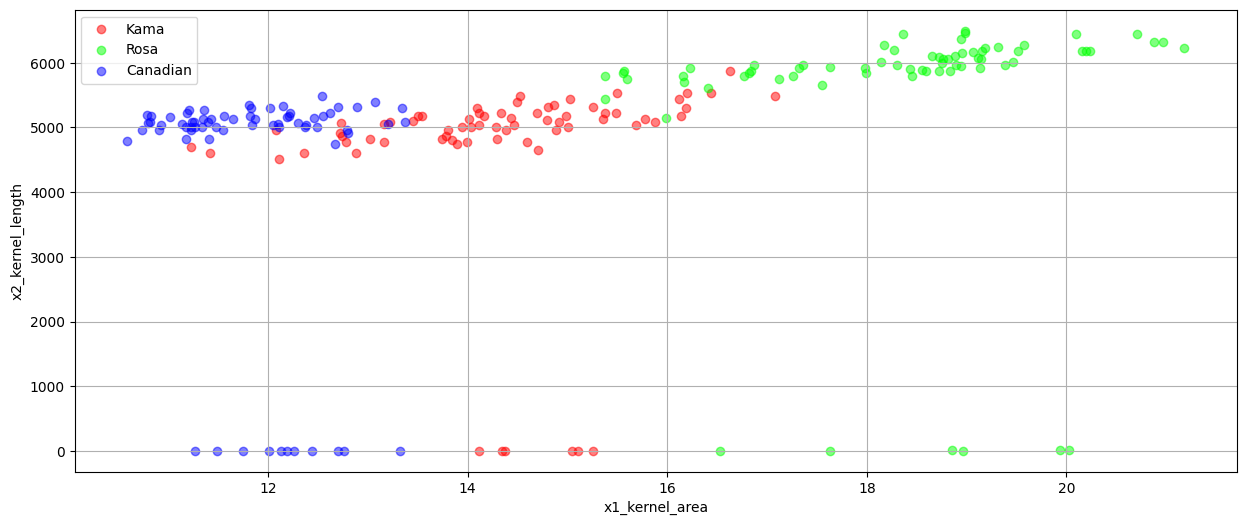

In [36]:
import matplotlib.pyplot as plt
# draw scatter plot of 'x1_kernel_area' and 'x2_kernel_length'
# with different colors for different 'wheat_varieties'
plt.figure(figsize=(15, 6))
df_cls_kama = data[data['wheat_varieties'] == 'Kama']
df_cls_rosa = data[data['wheat_varieties'] == 'Rosa']
df_cls_canadian = data[data['wheat_varieties'] == 'Canadian']
x_coord = 'x1_kernel_area'
y_coord = 'x2_kernel_length'
plt.scatter(df_cls_kama[x_coord], df_cls_kama[y_coord], color=(1,0,0,0.5), label='Kama')
plt.scatter(df_cls_rosa[x_coord], df_cls_rosa[y_coord], color=(0,1,0,0.5), label='Rosa')
plt.scatter(df_cls_canadian[x_coord], df_cls_canadian[y_coord], color=(0,0,1,0.5), label='Canadian')
plt.xlabel('x1_kernel_area')
plt.ylabel('x2_kernel_length')
plt.grid()
plt.legend()
plt.show()

In [35]:
# export dataframe to csv file, encoding utf-8
data.to_csv('./data.csv', encoding='utf-8', index=False)